# Exploratory Data Analysis

In [18]:
import polars as pl

# define the schema of the dataframe
event_schema = pl.Struct({"aid": pl.UInt32, "ts": pl.Int64, "type": str})
df_schema = {"session": pl.UInt32, "events": pl.List(event_schema)}
df = pl.read_ndjson('../data/train.jsonl', schema=df_schema, low_memory=True)

# print(df.head())

exploded_df = (
    df
    .explode("events")
    .unnest("events")
    # Convert ts to seconds and cast to UInt32 to save memory
    .with_columns((pl.col("ts")//1000).cast(pl.UInt32))
    # Take last half of train set to save memory
    .filter(pl.col("ts") > pl.median("ts"))
)

print(exploded_df)

shape: (108_357_960, 4)
┌──────────┬─────────┬────────────┬────────┐
│ session  ┆ aid     ┆ ts         ┆ type   │
│ ---      ┆ ---     ┆ ---        ┆ ---    │
│ u32      ┆ u32     ┆ u32        ┆ str    │
╞══════════╪═════════╪════════════╪════════╡
│ 0        ┆ 723931  ┆ 1660544235 ┆ clicks │
│ 0        ┆ 1436439 ┆ 1660544269 ┆ clicks │
│ 0        ┆ 1693461 ┆ 1660544287 ┆ clicks │
│ 0        ┆ 1206554 ┆ 1660544299 ┆ clicks │
│ 0        ┆ 1110741 ┆ 1660546139 ┆ clicks │
│ …        ┆ …       ┆ …          ┆ …      │
│ 12899776 ┆ 1737908 ┆ 1661723987 ┆ clicks │
│ 12899777 ┆ 384045  ┆ 1661723976 ┆ clicks │
│ 12899777 ┆ 384045  ┆ 1661723986 ┆ clicks │
│ 12899778 ┆ 561560  ┆ 1661723983 ┆ clicks │
│ 12899778 ┆ 32070   ┆ 1661723994 ┆ clicks │
└──────────┴─────────┴────────────┴────────┘


In [11]:
import polars as pl

df_schema = {
    "session": pl.UInt32,
    "aid": pl.UInt32,
    "ts": pl.UInt32,
    "type": pl.Utf8
}
train_sessions = pl.read_csv("../data/generated/train_events_last_half.csv", schema=df_schema, low_memory=True)

print(train_sessions)


print("train sessions", train_sessions.select("session").n_unique())

shape: (99_080_120, 4)
┌──────────┬─────────┬────────────┬────────┐
│ session  ┆ aid     ┆ ts         ┆ type   │
│ ---      ┆ ---     ┆ ---        ┆ ---    │
│ u32      ┆ u32     ┆ u32        ┆ str    │
╞══════════╪═════════╪════════════╪════════╡
│ 1        ┆ 723931  ┆ 1660544235 ┆ clicks │
│ 1        ┆ 1436439 ┆ 1660544269 ┆ clicks │
│ 1        ┆ 1693461 ┆ 1660544287 ┆ clicks │
│ 1        ┆ 1206554 ┆ 1660544299 ┆ clicks │
│ 2        ┆ 1110741 ┆ 1660546139 ┆ clicks │
│ …        ┆ …       ┆ …          ┆ …      │
│ 13925402 ┆ 1737908 ┆ 1661723987 ┆ clicks │
│ 13925403 ┆ 384045  ┆ 1661723976 ┆ clicks │
│ 13925403 ┆ 384045  ┆ 1661723986 ┆ clicks │
│ 13925404 ┆ 561560  ┆ 1661723983 ┆ clicks │
│ 13925404 ┆ 32070   ┆ 1661723994 ┆ clicks │
└──────────┴─────────┴────────────┴────────┘
train sessions 13925404


In [5]:
from src.data_generation.create_sessions import create_sessions

# create sessions
train_sessions = create_sessions(train_sessions)
print(train_sessions)

shape: (99_080_120, 4)
┌──────────┬─────────┬────────────┬────────┐
│ session  ┆ aid     ┆ ts         ┆ type   │
│ ---      ┆ ---     ┆ ---        ┆ ---    │
│ u32      ┆ u32     ┆ u32        ┆ str    │
╞══════════╪═════════╪════════════╪════════╡
│ 1        ┆ 723931  ┆ 1660544235 ┆ clicks │
│ 1        ┆ 1436439 ┆ 1660544269 ┆ clicks │
│ 1        ┆ 1693461 ┆ 1660544287 ┆ clicks │
│ 1        ┆ 1206554 ┆ 1660544299 ┆ clicks │
│ 2        ┆ 1110741 ┆ 1660546139 ┆ clicks │
│ …        ┆ …       ┆ …          ┆ …      │
│ 13925402 ┆ 1737908 ┆ 1661723987 ┆ clicks │
│ 13925403 ┆ 384045  ┆ 1661723976 ┆ clicks │
│ 13925403 ┆ 384045  ┆ 1661723986 ┆ clicks │
│ 13925404 ┆ 561560  ┆ 1661723983 ┆ clicks │
│ 13925404 ┆ 32070   ┆ 1661723994 ┆ clicks │
└──────────┴─────────┴────────────┴────────┘


In [10]:
event_schema = pl.Struct({"aid": pl.UInt32, "ts": pl.UInt32, "type": str})
df_schema = {"session": pl.UInt32, "events": pl.List(event_schema)}
test_sessions = (
    pl.read_ndjson('../data/generated/test_sessions_first_half.jsonl', schema=df_schema, low_memory=True)
    .explode("events")
    .unnest("events")
)

print(test_sessions)

print("test sessions", test_sessions.select("session").n_unique())

shape: (2_932_339, 4)
┌─────────┬─────────┬────────────┬────────┐
│ session ┆ aid     ┆ ts         ┆ type   │
│ ---     ┆ ---     ┆ ---        ┆ ---    │
│ u32     ┆ u32     ┆ u32        ┆ str    │
╞═════════╪═════════╪════════════╪════════╡
│ 211584  ┆ 1005472 ┆ 1661975174 ┆ clicks │
│ 211584  ┆ 587762  ┆ 1661975180 ┆ carts  │
│ 211584  ┆ 1673641 ┆ 1661975189 ┆ clicks │
│ 211584  ┆ 1673641 ┆ 1661975199 ┆ carts  │
│ 211584  ┆ 1557927 ┆ 1661975214 ┆ clicks │
│ …       ┆ …       ┆ …          ┆ …      │
│ 405286  ┆ 329897  ┆ 1661955178 ┆ clicks │
│ 292030  ┆ 1423146 ┆ 1661883004 ┆ clicks │
│ 292030  ┆ 1412570 ┆ 1661883030 ┆ clicks │
│ 243274  ┆ 159789  ┆ 1661864988 ┆ clicks │
│ 243274  ┆ 1745713 ┆ 1661865020 ┆ clicks │
└─────────┴─────────┴────────────┴────────┘
test sessions 514739


In [9]:
train_aids = pl.Series(train_sessions.select("aid").unique()).to_list()
test_aids = pl.Series(test_sessions.select("aid").unique()).to_list()

print(f"Train aids: {len(train_aids)}")
print(f"Test aids: {len(test_aids)}")

common_aids = set(train_aids).intersection(test_aids)
print(f"Common aids: {len(common_aids)}")

# Test aids not found in train
test_aids_not_in_train = set(test_aids) - set(train_aids)
print(f"Test aids not found in train: {len(test_aids_not_in_train)}, {len(test_aids_not_in_train) / len(test_aids) * 100:.2f}%")

Train aids: 1770307
Test aids: 508146
Common aids: 505657
Test aids not found in train: 2489, 0.49%


### Amount of events per session

In [10]:
# amount of events per session
session_events_count = (
    train_sessions
    .group_by("session")
    .agg(pl.len().alias("session_events_count"))
    .select("session_events_count")
)

print(session_events_count.describe())

shape: (9, 2)
┌────────────┬──────────────────────┐
│ statistic  ┆ session_events_count │
│ ---        ┆ ---                  │
│ str        ┆ f64                  │
╞════════════╪══════════════════════╡
│ count      ┆ 1.3925404e7          │
│ null_count ┆ 0.0                  │
│ mean       ┆ 7.115063             │
│ std        ┆ 9.332812             │
│ min        ┆ 2.0                  │
│ 25%        ┆ 2.0                  │
│ 50%        ┆ 4.0                  │
│ 75%        ┆ 8.0                  │
│ max        ┆ 486.0                │
└────────────┴──────────────────────┘


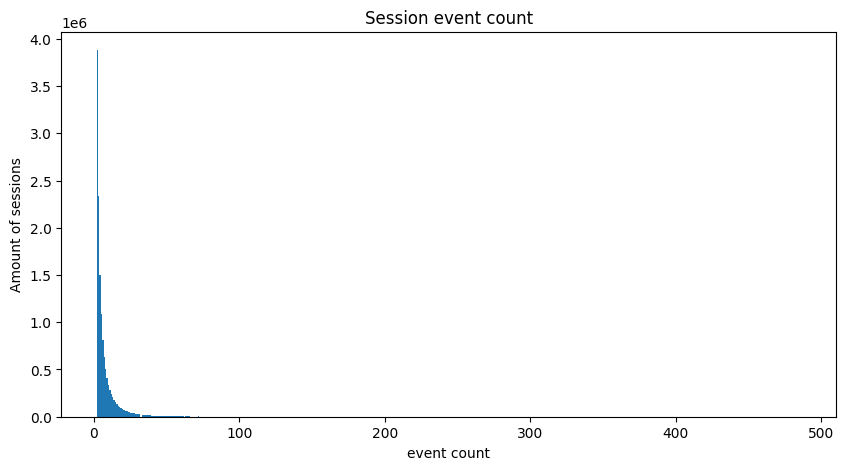

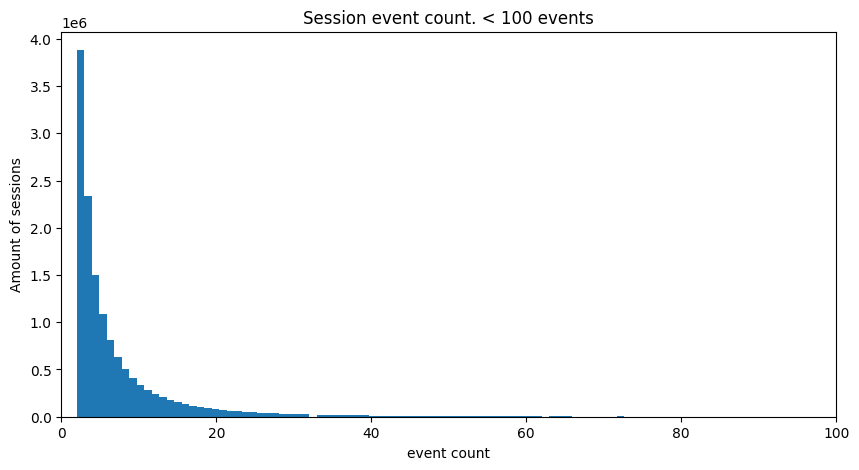

In [77]:
import matplotlib.pyplot as plt

events_counts = session_events_count.to_numpy().reshape(-1)

plt.figure(figsize=(10, 5))
plt.hist(events_counts, bins=500)
plt.title("Session event count")
plt.xlabel("event count")
plt.ylabel("Amount of sessions")
plt.show()

plt.figure(figsize=(10, 5))
plt.hist(events_counts, bins=500)
plt.xlim(0, 100)
plt.title("Session event count. < 100 events")
plt.xlabel("event count")
plt.ylabel("Amount of sessions")
plt.show()

Median events per session is 4. Max events per session is 486.

In [12]:
# Count how many percent are under 100 events
under_100 = session_events_count.filter(pl.col("session_events_count") < 100).height
total = session_events_count.height
print(f"Percentage of sessions with less than 100 events: {under_100 / total * 100:.2f}%")

# Count how many percent are under 50 events
under_50 = session_events_count.filter(pl.col("session_events_count") < 50).height
print(f"Percentage of sessions with less than 50 events: {under_50 / total * 100:.2f}%")

# Count how many percent are under 20 events
under_20 = session_events_count.filter(pl.col("session_events_count") < 20).height
print(f"Percentage of sessions with less than 20 events: {under_20 / total * 100:.2f}%")

# Count how many percent are under 10 events
under_10 = session_events_count.filter(pl.col("session_events_count") < 10).height
print(f"Percentage of sessions with less than 10 events: {under_10 / total * 100:.2f}%")

# Count how many percent are under 5 events
under_5 = session_events_count.filter(pl.col("session_events_count") < 5).height
print(f"Percentage of sessions with less than 5 events: {under_5 / total * 100:.2f}%")

# Count how many percent are 2 events
exactly_2 = session_events_count.filter(pl.col("session_events_count") == 2).height
print(f"Percentage of sessions with 2 events: {exactly_2 / total * 100:.2f}%")

Percentage of sessions with less than 100 events: 99.92%
Percentage of sessions with less than 50 events: 99.18%
Percentage of sessions with less than 20 events: 93.29%
Percentage of sessions with less than 10 events: 80.13%
Percentage of sessions with less than 5 events: 55.48%
Percentage of sessions with 2 events: 27.88%


### Amount of each event type

In [14]:
# count amount of each event type
events_count = (
    train_sessions
    .select(["type"])
    .rename({"type": "event_type"})
    .group_by("event_type")
    .agg(
        pl.count("event_type")
        .alias("count")
    )
)

print(events_count)

shape: (3, 2)
┌────────────┬──────────┐
│ event_type ┆ count    │
│ ---        ┆ ---      │
│ str        ┆ u32      │
╞════════════╪══════════╡
│ clicks     ┆ 88244682 │
│ carts      ┆ 8461377  │
│ orders     ┆ 2374061  │
└────────────┴──────────┘


In [15]:
def add_labels(x,y):
    for i in range(len(x)):
        if isinstance(y[i], float):
            plt.text(i, y[i], f"{y[i]:.2f}", ha = 'center')
        else:
            plt.text(i, y[i], y[i], ha = 'center')

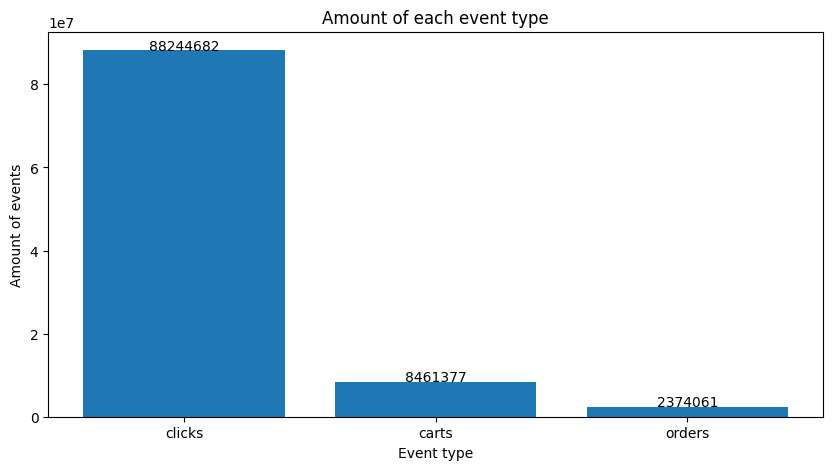

In [16]:
plt.figure(figsize=(10, 5))
plt.bar(events_count["event_type"].to_numpy(), events_count["count"].to_numpy())
add_labels(events_count["event_type"].to_numpy(), events_count["count"].to_numpy())
plt.title("Amount of each event type")
plt.xlabel("Event type")
plt.ylabel("Amount of events")
plt.show()

### Amount of events per aid

In [17]:
# count amount of events per aid
events_per_aid = (
    train_sessions
    .select(["aid"])
    .group_by("aid")
    .agg(
        pl.count("aid")
        .alias("events_count")
    )
    .sort("events_count")
)

print(events_per_aid)
print(events_per_aid.select("events_count").describe())

event_counts_distribution = (
    events_per_aid
    .select("events_count")
    .group_by("events_count")
    .agg(
        pl.count("events_count")
        .alias("aids_count")
    )
    .sort("events_count")
)

shape: (1_770_307, 2)
┌─────────┬──────────────┐
│ aid     ┆ events_count │
│ ---     ┆ ---          │
│ u32     ┆ u32          │
╞═════════╪══════════════╡
│ 1544393 ┆ 1            │
│ 1575994 ┆ 1            │
│ 835656  ┆ 1            │
│ 445703  ┆ 1            │
│ 1011557 ┆ 1            │
│ …       ┆ …            │
│ 1603001 ┆ 42775        │
│ 959208  ┆ 47862        │
│ 108125  ┆ 56873        │
│ 1460571 ┆ 59040        │
│ 485256  ┆ 110786       │
└─────────┴──────────────┘
shape: (9, 2)
┌────────────┬──────────────┐
│ statistic  ┆ events_count │
│ ---        ┆ ---          │
│ str        ┆ f64          │
╞════════════╪══════════════╡
│ count      ┆ 1.770307e6   │
│ null_count ┆ 0.0          │
│ mean       ┆ 55.967762    │
│ std        ┆ 343.123957   │
│ min        ┆ 1.0          │
│ 25%        ┆ 5.0          │
│ 50%        ┆ 10.0         │
│ 75%        ┆ 28.0         │
│ max        ┆ 110786.0     │
└────────────┴──────────────┘


[30.927517091668282, 20.639753443894197, 17.17594744866286, 15.220749847342862, 6.886206742672315, 2.7869742366719445, 1.54120161079406, 0.9676852658889108, 2.0673250458818724, 1.0449599984635434, 0.7416792680591558]
100.0


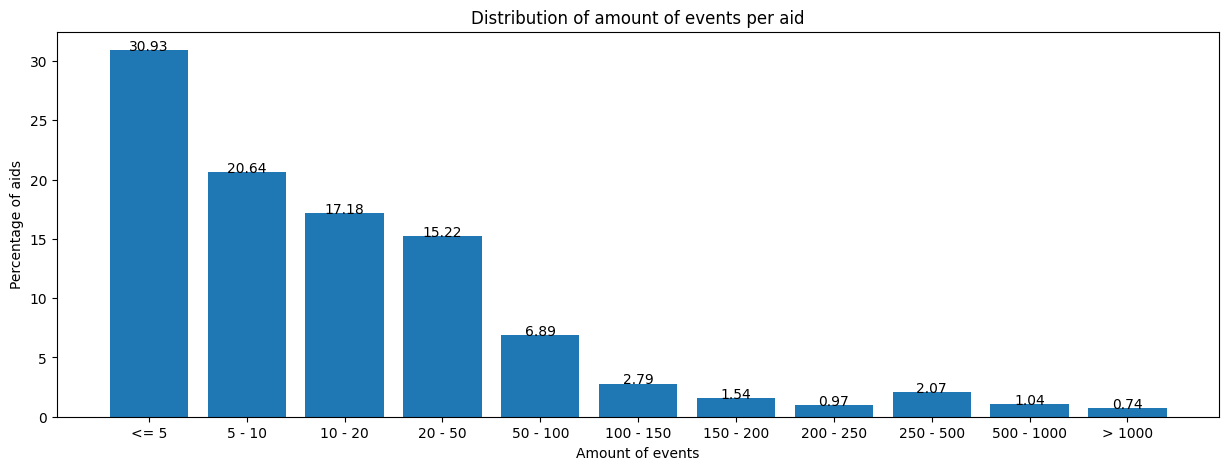

In [18]:
def get_percentage_under_n_events(amount_of_events):
    percentages = []
    labels = []

    total = events_per_aid.height
    len_events = len(amount_of_events)
    for i in range(len_events):
        if i == 0:
            count = events_per_aid.filter(pl.col("events_count") <= amount_of_events[i]).height
            percentages.append(count / total * 100)
            labels.append(f"<= {amount_of_events[i]}")
            continue

        n1 = amount_of_events[i-1]
        n2 = amount_of_events[i]

        count = events_per_aid.filter(pl.col("events_count") > n1, pl.col("events_count") <= n2).height
        percentages.append(count / total * 100)
        labels.append(f"{n1} - {n2}")

        if i == len_events-1:
            count = events_per_aid.filter(pl.col("events_count") > amount_of_events[i]).height
            percentages.append(count / total * 100)
            labels.append(f"> {amount_of_events[i]}")
            continue

    return percentages, labels

amount_of_events = [5, 10, 20, 50, 100, 150, 200, 250, 500, 1000]
percentages, labels = get_percentage_under_n_events(amount_of_events)
print(percentages)
print(sum(percentages))

plt.figure(figsize=(15, 5))
plt.bar(labels, percentages)
add_labels(labels, percentages)
plt.title("Distribution of amount of events per aid")
plt.xlabel("Amount of events")
plt.ylabel("Percentage of aids")
plt.show()

The distribution of the amount of events per aid is very skewed. many aids have very few events, while a few have a lot of events.

### Amount of orders per aid

In [22]:
# count amount of events per aid
orders_per_aid = (
    train_sessions
    .filter(pl.col("type") == "orders")
    .select(["aid"])
    .group_by("aid")
    .agg(
        pl.count("aid")
        .alias("orders_count")
    )
    .sort("orders_count")
)

print(orders_per_aid)
print(orders_per_aid.select("orders_count").describe())

print(orders_per_aid.filter(pl.col("orders_count") >= 10).n_unique())

shape: (457_719, 2)
┌─────────┬──────────────┐
│ aid     ┆ orders_count │
│ ---     ┆ ---          │
│ u32     ┆ u32          │
╞═════════╪══════════════╡
│ 1122050 ┆ 1            │
│ 462998  ┆ 1            │
│ 702205  ┆ 1            │
│ 1162166 ┆ 1            │
│ 1612031 ┆ 1            │
│ …       ┆ …            │
│ 231487  ┆ 1359         │
│ 1445562 ┆ 1501         │
│ 876493  ┆ 1581         │
│ 1603001 ┆ 1640         │
│ 166037  ┆ 1649         │
└─────────┴──────────────┘
shape: (9, 2)
┌────────────┬──────────────┐
│ statistic  ┆ orders_count │
│ ---        ┆ ---          │
│ str        ┆ f64          │
╞════════════╪══════════════╡
│ count      ┆ 457719.0     │
│ null_count ┆ 0.0          │
│ mean       ┆ 5.186722     │
│ std        ┆ 18.792958    │
│ min        ┆ 1.0          │
│ 25%        ┆ 1.0          │
│ 50%        ┆ 2.0          │
│ 75%        ┆ 4.0          │
│ max        ┆ 1649.0       │
└────────────┴──────────────┘
46788


Median order count is 2 orders. Top 25 % of ordered items have more than 4 orders

### Amount of sessions and aids

In [23]:
# Count the amount of sessions
sessions_count = train_sessions.select("session").n_unique()

print("Amount of sessions:", sessions_count)

# Count unique items
items_count = (
    train_sessions
    .select("aid")
    .n_unique()
)

print("Amount of aids:", items_count)

Amount of sessions: 13925404
Amount of aids: 1770307


### Amount of aids with clicks, carts and orders

In [24]:
aids_with_clicks = (
    train_sessions
    .filter(pl.col("type") == "clicks")
    .select("aid")
    .n_unique()
)

aids_with_carts = (
    train_sessions
    .filter(pl.col("type") == "carts")
    .select("aid")
    .n_unique()
)

aids_with_orders = (
    train_sessions
    .filter(pl.col("type") == "orders")
    .select("aid")
    .n_unique()
)

print(f"Unique aids: {items_count}")
print(f"Unique aids with clicks: {aids_with_clicks}, {aids_with_clicks / items_count * 100:.2f}%")
print(f"Unique aids with carts: {aids_with_carts}, {aids_with_carts / items_count * 100:.2f}%")
print(f"Unique aids with orders: {aids_with_orders}, {aids_with_orders / items_count * 100:.2f}%")

Unique aids: 1770307
Unique aids with clicks: 1768299, 99.89%
Unique aids with carts: 943540, 53.30%
Unique aids with orders: 457719, 25.86%


### Session length in minutes

In [68]:
# session length is counted as the last_ts - first_ts
session_length_minutes = (
    train_sessions
    .with_columns(
        session_start=pl.min("ts").over("session"),
        session_end=pl.max("ts").over("session"),
    )
    .with_columns(session_length_minutes=((pl.col("session_end") - pl.col("session_start")) / 60).cast(pl.Float32))
    .select(["session", "session_length_minutes"])
    .unique()
    .sort("session_length_minutes")
)

print(session_length_minutes)

print(session_length_minutes.select("session_length_minutes").describe())

sessions_under_2_hours_percentage = session_length_minutes.filter(pl.col("session_length_minutes") < 2*60).height / session_length_minutes.height * 100
print(f"Percentage of sessions of under 2 hour: {sessions_under_2_hours_percentage:.2f}%")

sessions_under_hour_percentage = session_length_minutes.filter(pl.col("session_length_minutes") < 1*60).height / session_length_minutes.height * 100
print(f"Percentage of sessions of under 1 hour: {sessions_under_hour_percentage:.2f}%")

sessions_under_30_min_percentage = session_length_minutes.filter(pl.col("session_length_minutes") < 0.5*60).height / session_length_minutes.height * 100
print(f"Percentage of sessions of under 30 min: {sessions_under_30_min_percentage:.2f}%")

shape: (13_925_404, 2)
┌──────────┬────────────────────────┐
│ session  ┆ session_length_minutes │
│ ---      ┆ ---                    │
│ u32      ┆ f32                    │
╞══════════╪════════════════════════╡
│ 4358950  ┆ 0.016667               │
│ 4713137  ┆ 0.016667               │
│ 1834864  ┆ 0.016667               │
│ 3833065  ┆ 0.016667               │
│ 3768724  ┆ 0.016667               │
│ …        ┆ …                      │
│ 6565268  ┆ 506.566681             │
│ 13403057 ┆ 507.116669             │
│ 5191881  ┆ 513.56665              │
│ 13622339 ┆ 572.099976             │
│ 10237351 ┆ 704.783325             │
└──────────┴────────────────────────┘
shape: (9, 2)
┌────────────┬────────────────────────┐
│ statistic  ┆ session_length_minutes │
│ ---        ┆ ---                    │
│ str        ┆ f64                    │
╞════════════╪════════════════════════╡
│ count      ┆ 1.3925404e7            │
│ null_count ┆ 0.0                    │
│ mean       ┆ 9.652189              

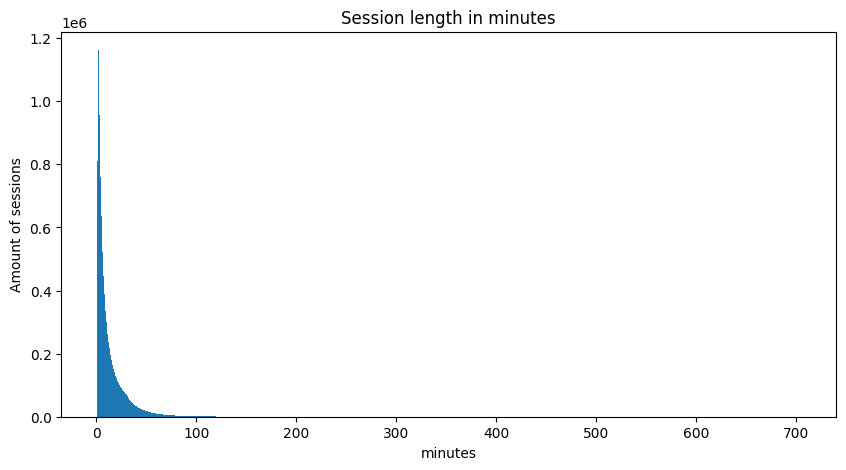

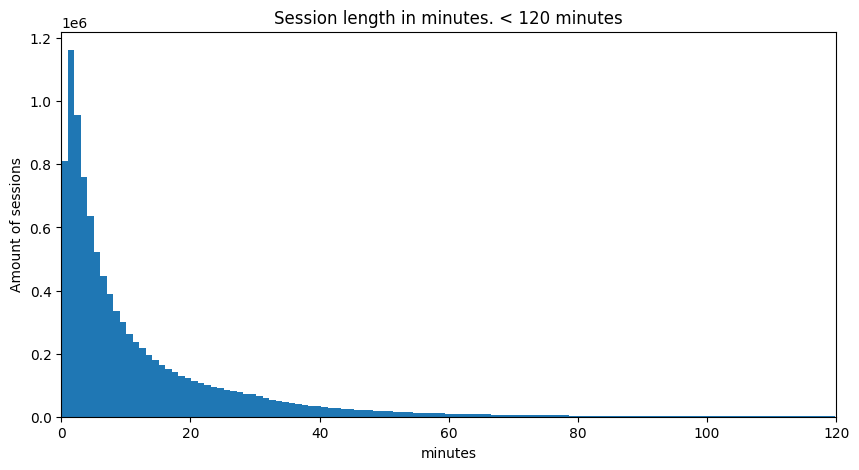

In [134]:
import matplotlib.pyplot as plt

minutes = session_length_minutes.select("session_length_minutes").to_numpy().reshape(-1)

plt.figure(figsize=(10, 5))
plt.hist(minutes, bins=700)
plt.title("Session length in minutes")
plt.xlabel("minutes")
plt.ylabel("Amount of sessions")
plt.show()

plt.figure(figsize=(10, 5))
plt.hist(minutes, bins=700)
plt.xlim(0, 120)
plt.title("Session length in minutes. < 120 minutes")
plt.xlabel("minutes")
plt.ylabel("Amount of sessions")
plt.show()

The session lengths are relatively short. Median session length is 4 minutes. 75% of sessions are under 12 minutes.

### Session statistics

In [84]:
time_between_events_in_session = (
    train_sessions
    .sort(["session", "ts"])
    .with_columns(
        next_session = pl.col("session").shift(-1),
        next_ts = pl.col("ts").shift(-1),
    )
    .with_columns(
        time_between_sec = pl.when(pl.col("session") == pl.col("next_session")).then((pl.col("next_ts") - pl.col("ts"))).otherwise(None)
    )
    .select("time_between_sec")
    .drop_nulls()
    .sort("time_between_sec", descending=True)
)

print(time_between_events_in_session.describe())

shape: (9, 2)
┌────────────┬──────────────────┐
│ statistic  ┆ time_between_sec │
│ ---        ┆ ---              │
│ str        ┆ f64              │
╞════════════╪══════════════════╡
│ count      ┆ 8.5154716e7      │
│ null_count ┆ 0.0              │
│ mean       ┆ 94.705712        │
│ std        ┆ 188.930584       │
│ min        ┆ 0.0              │
│ 25%        ┆ 17.0             │
│ 50%        ┆ 38.0             │
│ 75%        ┆ 87.0             │
│ max        ┆ 1799.0           │
└────────────┴──────────────────┘


Median time between events is 38 seconds. 75% of events are under 1.5 minutes apart.

In [95]:
less_than_15_mins = time_between_events_in_session.filter(pl.col("time_between_sec") < 15*60).height
total = time_between_events_in_session.height
print(f"Percentage of time between events under 15 minutes: {less_than_15_mins / total * 100:.2f}%")

less_than_10_mins = time_between_events_in_session.filter(pl.col("time_between_sec") < 10*60).height
print(f"Percentage of time between events under 10 minutes: {less_than_10_mins / total * 100:.2f}%")

less_than_5_mins = time_between_events_in_session.filter(pl.col("time_between_sec") < 5*60).height
print(f"Percentage of time between events under 5 minutes: {less_than_5_mins / total * 100:.2f}%")

Percentage of time between events under 15 minutes: 98.49%
Percentage of time between events under 10 minutes: 97.26%
Percentage of time between events under 5 minutes: 93.66%


Mean event count is 7.09 where as the median event count is 4. Mean sub session length is 9.55 minutes where as the median sub session length is 4 minutes.
Max event count is 486 and max sub session length is 11 hours and 74 minutes.

### Subsequent clicks

Let's see how many aids have subsequent clicks to itself.

In [96]:
subsequent_clicks_count = (
    train_sessions
    .sort(["session", "ts"])
    .with_columns(
        next_aid = pl.col("aid").shift(-1),
        next_type = pl.col("type").shift(-1),
        next_session = pl.col("session").shift(-1)
    )
    .filter((pl.col("session") == pl.col("next_session")) & (pl.col("type") == "clicks") & (pl.col("next_type") == "clicks") & (pl.col("aid") == pl.col("next_aid")))
    .group_by(["aid", "next_aid"])
    .agg(pl.len().alias("count"))
    .sort("count", descending=True)
)
print(subsequent_clicks_count)

print(f"Unique aids: {items_count}")
print(f"Clicks on same aid: {subsequent_clicks_count.height}")
print(f"Percentage of aids having subsequent clicks to itself {subsequent_clicks_count.height / items_count * 100:.2f} %")

shape: (873_369, 3)
┌─────────┬──────────┬───────┐
│ aid     ┆ next_aid ┆ count │
│ ---     ┆ ---      ┆ ---   │
│ u32     ┆ u32      ┆ u32   │
╞═════════╪══════════╪═══════╡
│ 485256  ┆ 485256   ┆ 32294 │
│ 1551213 ┆ 1551213  ┆ 11523 │
│ 1460571 ┆ 1460571  ┆ 8574  │
│ 1603001 ┆ 1603001  ┆ 7104  │
│ 613493  ┆ 613493   ┆ 6957  │
│ …       ┆ …        ┆ …     │
│ 1070788 ┆ 1070788  ┆ 1     │
│ 1160254 ┆ 1160254  ┆ 1     │
│ 1222921 ┆ 1222921  ┆ 1     │
│ 984295  ┆ 984295   ┆ 1     │
│ 139805  ┆ 139805   ┆ 1     │
└─────────┴──────────┴───────┘
Unique aids: 1770307
Clicks on same aid: 873369
Percentage of aids having subsequent clicks to itself 49.33 %


49.33 % of aids have subsequent clicks to itself.

### Carts and orders

In [98]:
carts_of_sessions = (
    train_sessions
    .filter(pl.col("type") == "carts")
    .rename({"aid": "cart_aid", "ts": "cart_ts"})
    .drop("type")
)

orders_of_sessions = (
    train_sessions
    .filter(pl.col("type") == "orders")
    .rename({"aid": "order_aid", "ts": "order_ts"})
    .drop("type")
)

n_orders = orders_of_sessions.height
n_carts = carts_of_sessions.height
cart_drop_out_rate = n_orders / n_carts

print("carted items:", n_carts)
print("ordered items:", n_orders)
print(f"cart dropout rate: {(1-cart_drop_out_rate) * 100:.2f} %")

carted items: 8461377
ordered items: 2374061
cart dropout rate: 71.94 %


In [99]:
aids_cart_count = (
    carts_of_sessions
    .group_by("cart_aid")
    .agg(pl.len().alias("cart_count"))
    .sort("cart_count", descending=True)
)

aids_order_count = (
    orders_of_sessions
    .group_by("order_aid")
    .agg(pl.len().alias("order_count"))
    .sort("order_count", descending=True)
)

aids_carts_and_orders_count = (
    aids_cart_count
    .join(aids_order_count, left_on="cart_aid", right_on="order_aid", how="left")
    .with_columns(pl.col("order_count").fill_null(strategy="zero"))
    .with_columns(order_rate=pl.col("order_count") / pl.col("cart_count") * 100)
    .sort("order_rate", descending=True)
)

print(aids_carts_and_orders_count)
print(aids_carts_and_orders_count.select(["cart_count", "order_count", "order_rate"]).describe())

shape: (943_540, 4)
┌──────────┬────────────┬─────────────┬────────────┐
│ cart_aid ┆ cart_count ┆ order_count ┆ order_rate │
│ ---      ┆ ---        ┆ ---         ┆ ---        │
│ u32      ┆ u32        ┆ u32         ┆ f64        │
╞══════════╪════════════╪═════════════╪════════════╡
│ 494232   ┆ 1          ┆ 11          ┆ 1100.0     │
│ 738304   ┆ 1          ┆ 6           ┆ 600.0      │
│ 264236   ┆ 2          ┆ 9           ┆ 450.0      │
│ 209864   ┆ 3          ┆ 12          ┆ 400.0      │
│ 893234   ┆ 1          ┆ 4           ┆ 400.0      │
│ …        ┆ …          ┆ …           ┆ …          │
│ 239740   ┆ 1          ┆ 0           ┆ 0.0        │
│ 893025   ┆ 1          ┆ 0           ┆ 0.0        │
│ 1596150  ┆ 1          ┆ 0           ┆ 0.0        │
│ 962488   ┆ 1          ┆ 0           ┆ 0.0        │
│ 1033011  ┆ 1          ┆ 0           ┆ 0.0        │
└──────────┴────────────┴─────────────┴────────────┘
shape: (9, 4)
┌────────────┬────────────┬─────────────┬────────────┐
│ statisti

The data contains aids that have been ordered more times than they have been carted. This is likely due to the fact that the some of the data is missing.

### Clicks before order in sessions

Let's see how many clicks usually happen before an order in a session.

In [123]:
sessions_with_orders = (
    train_sessions
    .filter(pl.col("type") == "orders")
    .select("session")
    .unique()
)

clicks_before_orders = (
    train_sessions
    .join(sessions_with_orders, on="session", how="inner")
    .sort(["session", "ts"])
    .filter(pl.col("type") != "carts")
    # group consecutive clicks and consecutive orders into their own groups
    .with_columns(group=pl.struct((pl.col("type") == "orders"), pl.col("session")).rle_id().cast(pl.UInt32))
    .group_by(["session", "type", "group"])
    .agg(pl.len().alias("count"))
    .sort(["session", "group"])
    .with_columns(
        next_session=pl.col("session").shift(-1),
        next_type=pl.col("type").shift(-1),
        next_group=pl.col("group").shift(-1),
        # next_count=pl.col("count").shift(-1)
    )
    .filter((pl.col("session") == pl.col("next_session")) & (pl.col("type") == "clicks") & (pl.col("next_type") == "orders"))
    .select("count")
    .sort("count")
)

print(clicks_before_orders.describe())

shape: (9, 2)
┌────────────┬────────────┐
│ statistic  ┆ count      │
│ ---        ┆ ---        │
│ str        ┆ f64        │
╞════════════╪════════════╡
│ count      ┆ 1.144106e6 │
│ null_count ┆ 0.0        │
│ mean       ┆ 8.529454   │
│ std        ┆ 11.510666  │
│ min        ┆ 1.0        │
│ 25%        ┆ 2.0        │
│ 50%        ┆ 4.0        │
│ 75%        ┆ 10.0       │
│ max        ┆ 350.0      │
└────────────┴────────────┘


Median click count before order is 4 clicks. Top 75% of orders have 10 or less clicks before them.

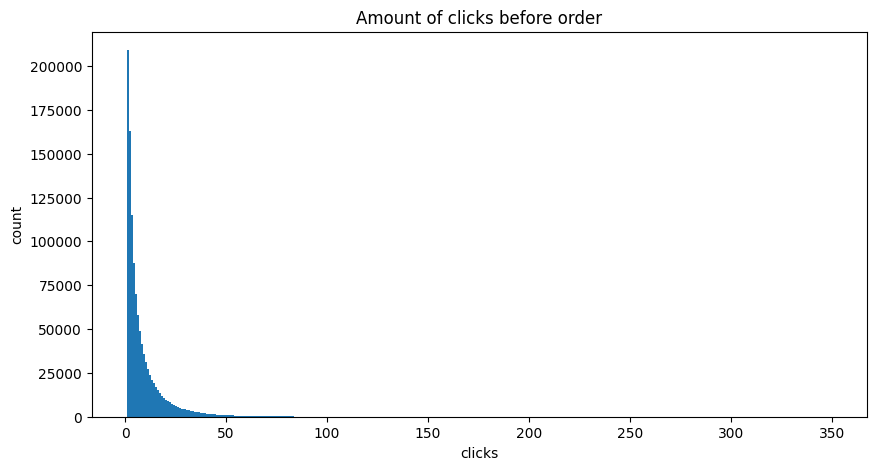

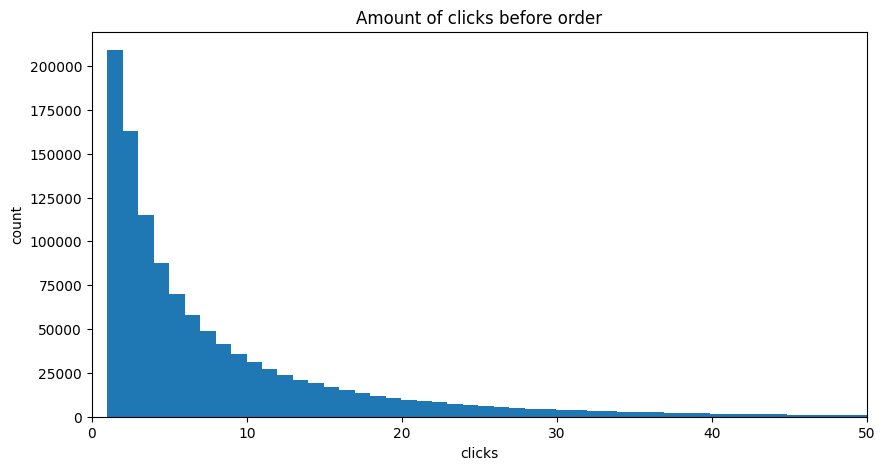

In [132]:
import matplotlib.pyplot as plt

clicks = clicks_before_orders.to_numpy().reshape(-1)

plt.figure(figsize=(10, 5))
plt.hist(clicks, bins=350)
plt.title("Amount of clicks before order")
plt.xlabel("clicks")
plt.ylabel("count")
plt.show()

plt.figure(figsize=(10, 5))
plt.hist(clicks, bins=350)
plt.xlim(0, 50)
plt.title("Amount of clicks before order")
plt.xlabel("clicks")
plt.ylabel("count")
plt.show()